# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [2065]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2066]:
garisKemiskinan_df = pd.read_csv("dataset_inisiasi/garisKemiskinan.csv", delimiter=",")
garisKemiskinan_df.head()

,provinsi,jenis,daerah,tahun,periode,gk
0,ACEH,MAKANAN,PERKOTAAN,2015,MARET,293697.0
1,ACEH,MAKANAN,PERKOTAAN,2015,SEPTEMBER,302128.0
2,ACEH,MAKANAN,PERKOTAAN,2016,MARET,306243.0
3,ACEH,MAKANAN,PERKOTAAN,2016,SEPTEMBER,319768.0
4,ACEH,MAKANAN,PERDESAAN,2015,MARET,297479.0


In [2067]:
rataRataUpah_df = pd.read_csv("dataset_inisiasi/rataRataUpah.csv", delimiter=",")
rataRataUpah_df.head()

,provinsi,tahun,upah
0,ACEH,2015,11226
1,ACEH,2016,13627
2,ACEH,2017,14809
3,ACEH,2018,13814
4,ACEH,2019,15065


In [2068]:
pengeluaran_df = pd.read_csv("dataset_inisiasi/pengeluaran.csv", delimiter=",")
pengeluaran_df.head()

,provinsi,daerah,jenis,tahun,peng
0,ACEH,PERDESAAN,MAKANAN,2007,195176.0
1,ACEH,PERDESAAN,MAKANAN,2008,218781.0
2,ACEH,PERDESAAN,MAKANAN,2009,247427.0
3,ACEH,PERDESAAN,MAKANAN,2010,275749.0
4,ACEH,PERDESAAN,MAKANAN,2011,308000.0


In [2069]:
minUpah_df = pd.read_csv("dataset_inisiasi/minUpah.csv", delimiter=",")
minUpah_df.head()

,provinsi,tahun,ump
0,ACEH,2002,330000.0
1,ACEH,2003,425000.0
2,ACEH,2004,550000.0
3,ACEH,2005,620000.0
4,ACEH,2006,820000.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [2070]:
def analisis_data(df):
    print(df.info())
    print("\n-------------------------------------------------------------------------------\n")
    print(f"Data Kosong : \n\n{df.isna().sum()}")
    print("\n-------------------------------------------------------------------------------\n")
    print(f"Data ganda  : {df.duplicated().sum()}")
    print("\n-------------------------------------------------------------------------------\n")
    print(df.describe)

In [2071]:
analisis_data(garisKemiskinan_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  5460 non-null   object 
 1   jenis     5460 non-null   object 
 2   daerah    5460 non-null   object 
 3   tahun     5460 non-null   int64  
 4   periode   5460 non-null   object 
 5   gk        5261 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 256.1+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi      0
jenis         0
daerah        0
tahun         0
periode       0
gk          199
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of        provinsi    jenis              daerah  tahun    periode        gk
0          ACEH  MA

In [2072]:
analisis_data(minUpah_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 735 entries, 0 to 734
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  735 non-null    object 
 1   tahun     735 non-null    int64  
 2   ump       711 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 17.4+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi     0
tahun        0
ump         24
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of       provinsi  tahun        ump
0         ACEH   2002   330000.0
1         ACEH   2003   425000.0
2         ACEH   2004   550000.0
3         ACEH   2005   620000.0
4         ACEH   2006   820000.0
..         ...    ...        ...
730  INDONESIA   2018  2268874.0

In [2073]:
analisis_data(pengeluaran_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4620 entries, 0 to 4619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  4620 non-null   object 
 1   daerah    4620 non-null   object 
 2   jenis     4620 non-null   object 
 3   tahun     4620 non-null   int64  
 4   peng      4512 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 180.6+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi      0
daerah        0
jenis         0
tahun         0
peng        108
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of        provinsi              daerah    jenis  tahun       peng
0          ACEH           PERDESAAN  MAKANAN   2007   195176.0
1          ACEH      

In [2074]:
analisis_data(rataRataUpah_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   provinsi  280 non-null    object
 1   tahun     280 non-null    int64 
 2   upah      280 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.7+ KB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi    0
tahun       0
upah        0
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 0

-------------------------------------------------------------------------------

<bound method NDFrame.describe of       provinsi  tahun   upah
0         ACEH   2015  11226
1         ACEH   2016  13627
2         ACEH   2017  14809
3         ACEH   2018  13814
4         ACEH   2019  15065
..         ...    ...    ...
275  INDONESIA   2018  15275
276  INDONESIA   2019  15823
277  INDONESIA   2020  

In [2075]:
def visualisasi_EDA(df, title):
    plt.title(label=title)
    plt.hist(df, bins=25)
    plt.show()

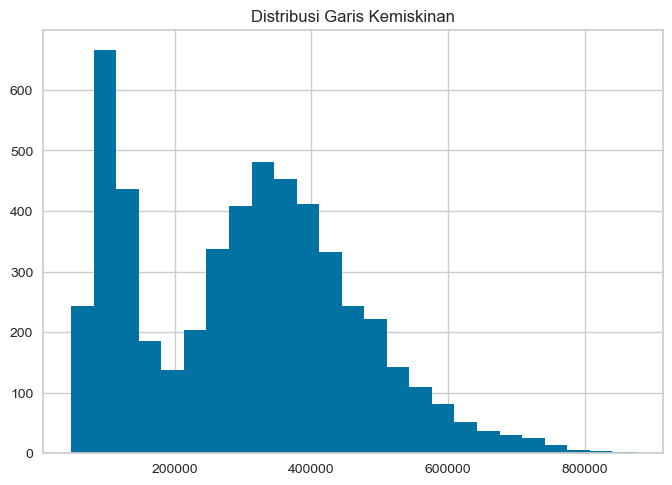

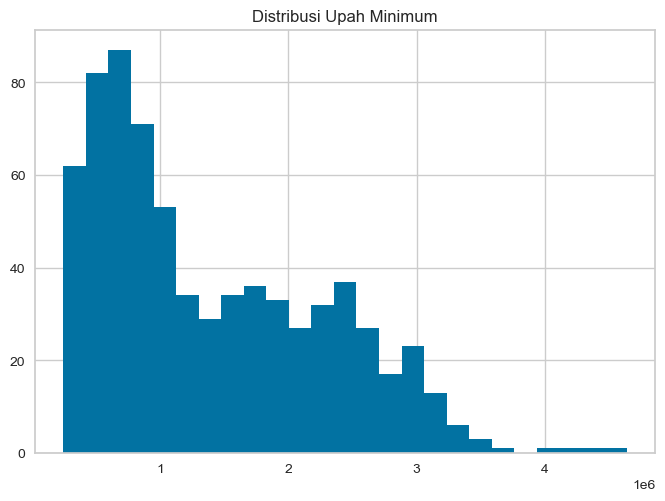

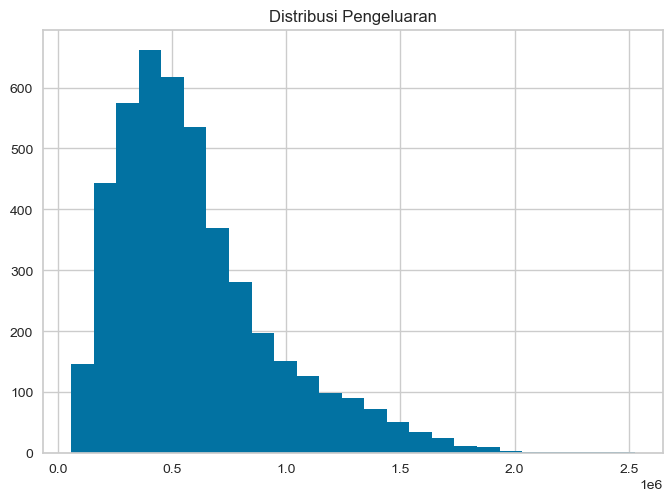

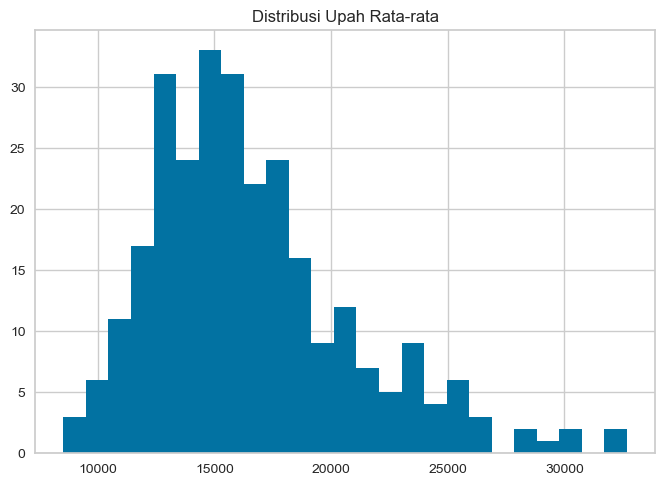

In [2076]:
visualisasi_EDA(garisKemiskinan_df["gk"], "Distribusi Garis Kemiskinan")
visualisasi_EDA(minUpah_df["ump"], "Distribusi Upah Minimum")
visualisasi_EDA(pengeluaran_df["peng"], "Distribusi Pengeluaran")
visualisasi_EDA(rataRataUpah_df["upah"], "Distribusi Upah Rata-rata")

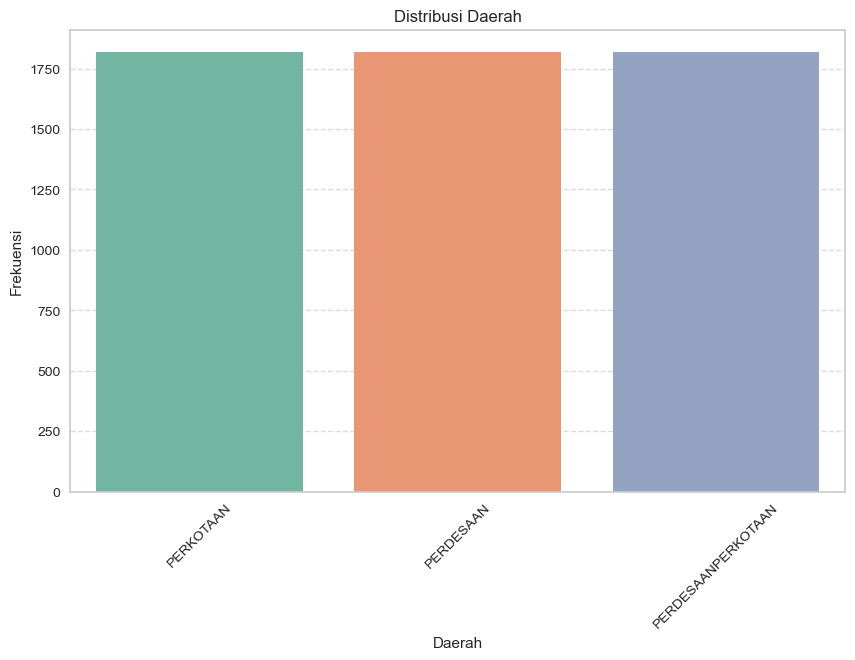

In [2077]:
plt.figure(figsize=(10, 6))
sns.countplot(x='daerah', data=garisKemiskinan_df, palette='Set2')
plt.title('Distribusi Daerah')
plt.xlabel('Daerah')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

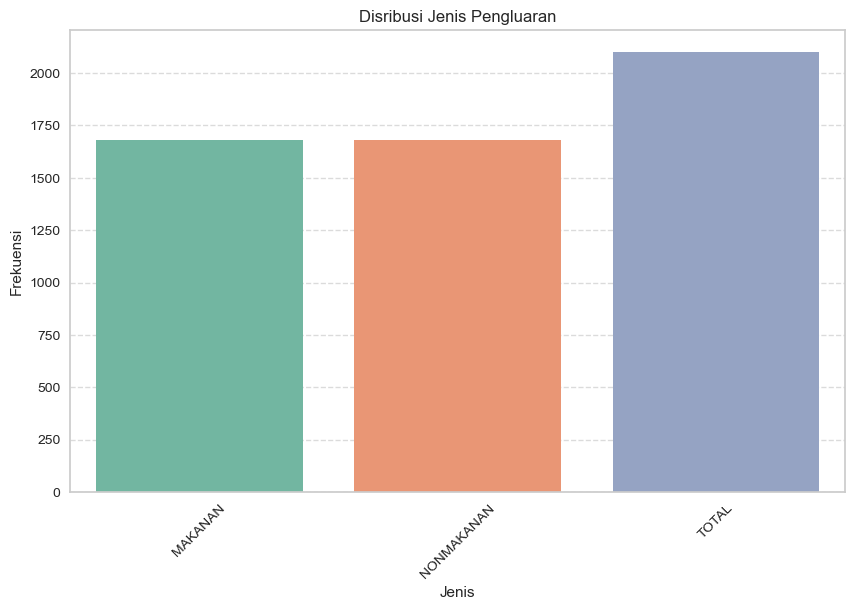

In [2078]:
plt.figure(figsize=(10, 6))
sns.countplot(x='jenis', data=garisKemiskinan_df, palette='Set2')
plt.title('Disribusi Jenis Pengluaran')
plt.xlabel('Jenis')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [2079]:
def fill_missing(df, col):
    print("---------------------------------------------------------")
    print(f"data sebelumnya : {len(df)}")
    df[col].fillna(value=df[col].mean(), inplace=True)
    print(f"Data kosong di {col} :\n{df.isna().sum()}\n")
    print(f"data setelahnya : {len(df)}\n")
    print("---------------------------------------------------------")

In [2080]:
fill_missing(garisKemiskinan_df, "gk")
fill_missing(minUpah_df, "ump")
fill_missing(pengeluaran_df, "peng")
fill_missing(rataRataUpah_df, "upah")

---------------------------------------------------------
data sebelumnya : 5460
Data kosong di gk :
provinsi    0
jenis       0
daerah      0
tahun       0
periode     0
gk          0
dtype: int64

data setelahnya : 5460

---------------------------------------------------------
---------------------------------------------------------
data sebelumnya : 735
Data kosong di ump :
provinsi    0
tahun       0
ump         0
dtype: int64

data setelahnya : 735

---------------------------------------------------------
---------------------------------------------------------
data sebelumnya : 4620
Data kosong di peng :
provinsi    0
daerah      0
jenis       0
tahun       0
peng        0
dtype: int64

data setelahnya : 4620

---------------------------------------------------------
---------------------------------------------------------
data sebelumnya : 280
Data kosong di upah :
provinsi    0
tahun       0
upah        0
dtype: int64

data setelahnya : 280

-------------------------------

In [2081]:
def visualisasi_outlier(df, col):
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[[col]])
    plt.show()

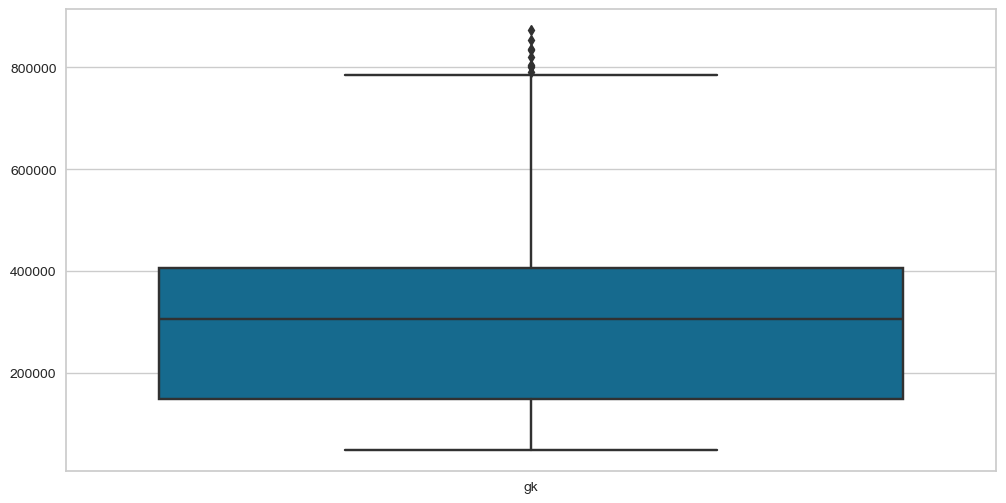

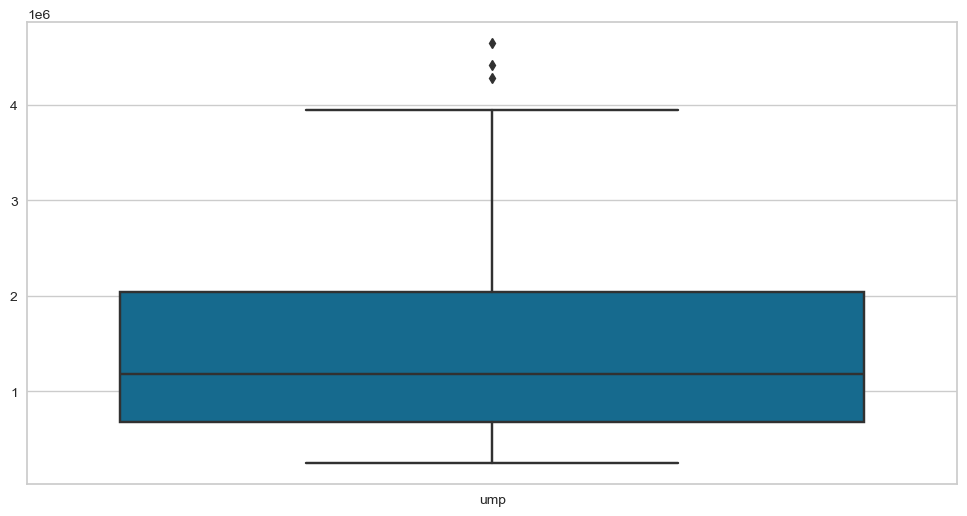

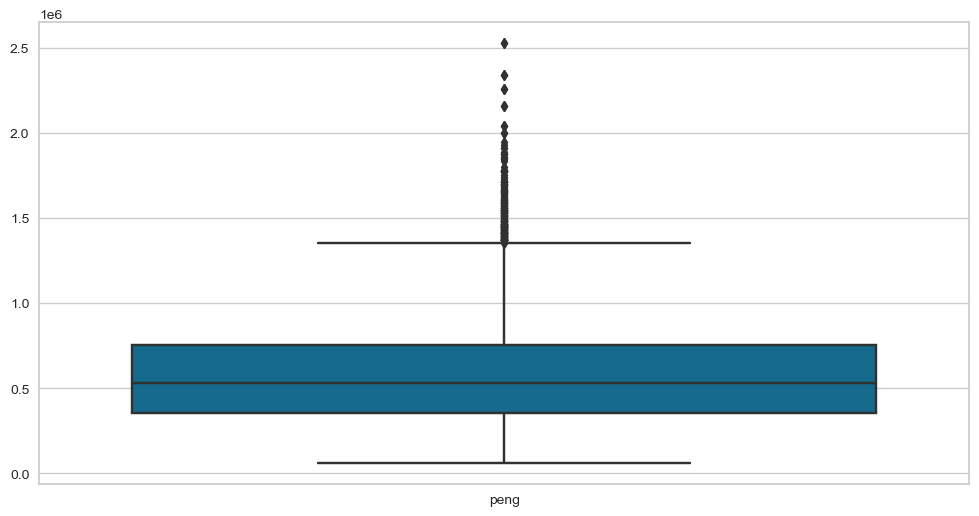

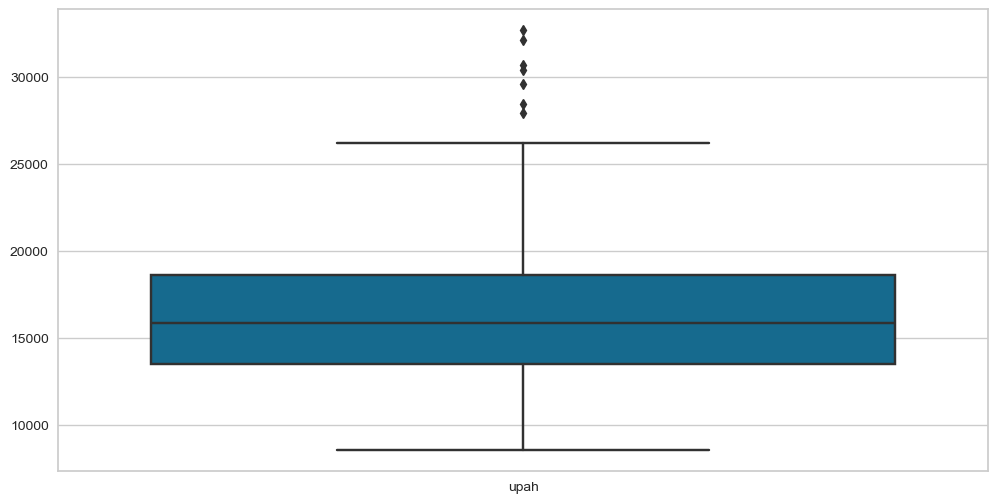

In [2082]:
visualisasi_outlier(garisKemiskinan_df, "gk")
visualisasi_outlier(minUpah_df, "ump")
visualisasi_outlier(pengeluaran_df, "peng")
visualisasi_outlier(rataRataUpah_df, "upah")

In [2083]:
def handle_outlier(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[~((df[col] < lower_bound) | (df[col] > upper_bound))]

    return df  

In [2084]:
garisKemiskinan_df = handle_outlier(garisKemiskinan_df, "gk")
minUpah_df = handle_outlier(minUpah_df, "ump")
pengeluaran_df = handle_outlier(pengeluaran_df, "peng")
rataRataUpah_df = handle_outlier(rataRataUpah_df, "upah")

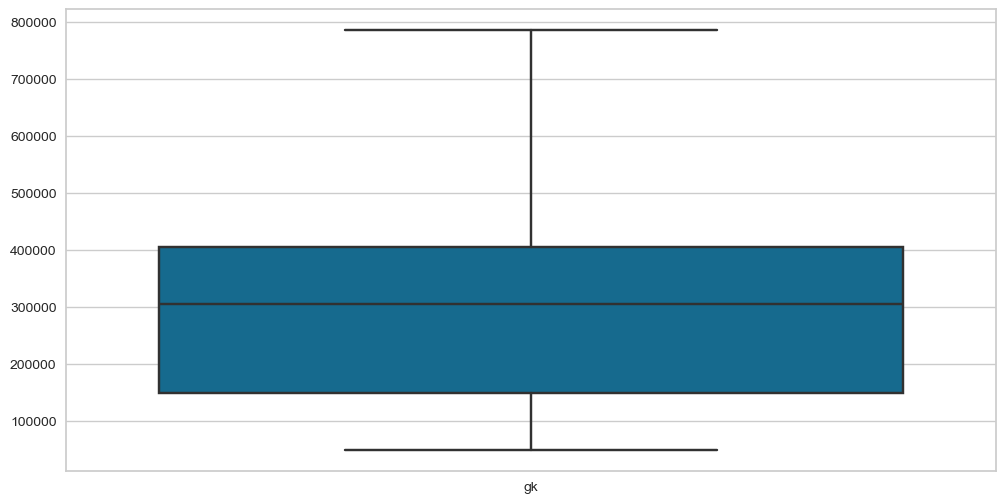

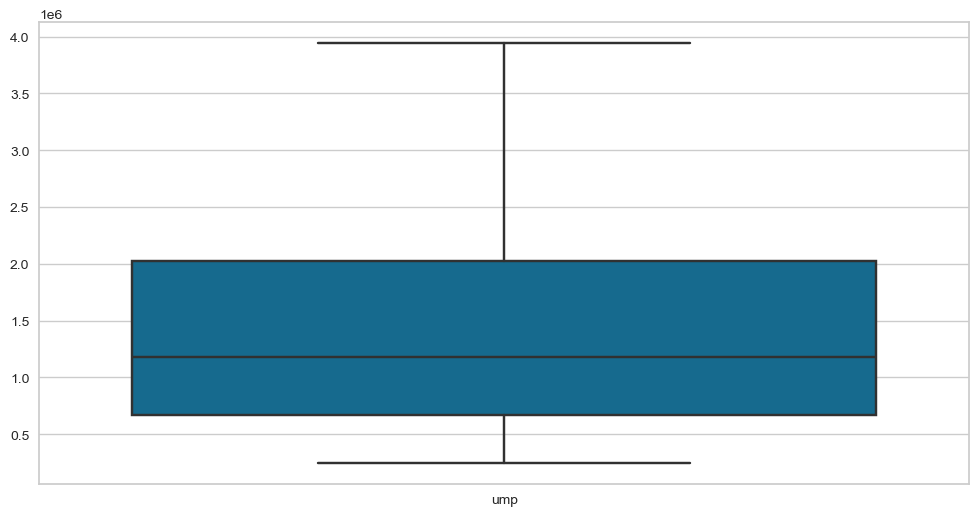

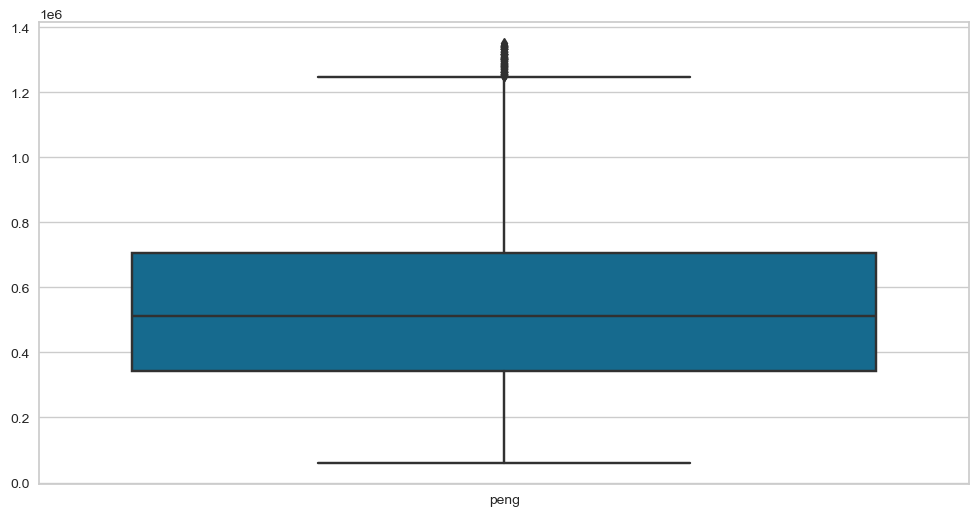

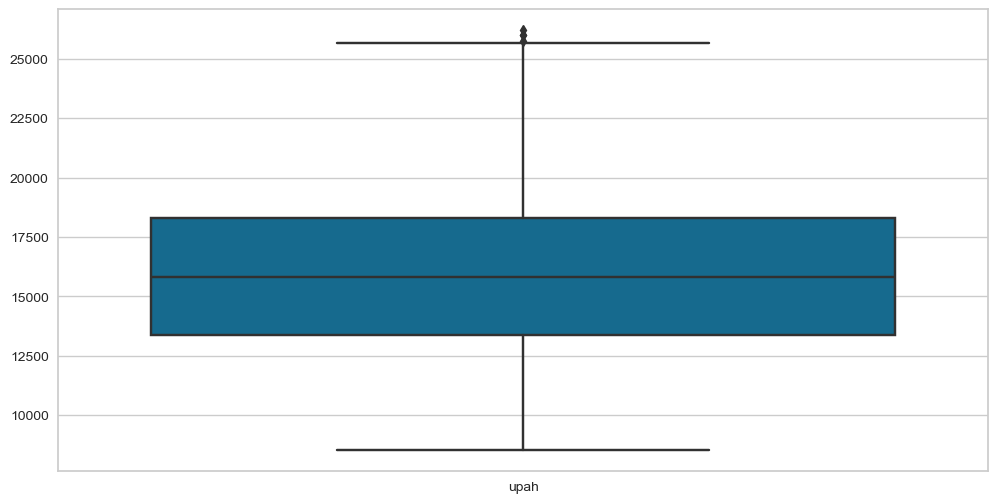

In [2085]:
visualisasi_outlier(garisKemiskinan_df, "gk")
visualisasi_outlier(minUpah_df, "ump")
visualisasi_outlier(pengeluaran_df, "peng")
visualisasi_outlier(rataRataUpah_df, "upah")

In [2086]:
merged_df = garisKemiskinan_df.merge(minUpah_df, on=['provinsi', 'tahun']) \
                       .merge(pengeluaran_df, on=['provinsi', 'tahun']) \
                       .merge(rataRataUpah_df, on=['provinsi', 'tahun'])

merged_df = merged_df.drop(columns=["daerah_y", "jenis_y", "periode"])
merged_df.rename(columns={"daerah_x": "daerah"}, inplace=True)
merged_df.rename(columns={"jenis_x": "jenis"}, inplace=True)

print(merged_df.head())

  provinsi    jenis     daerah  tahun        gk        ump      peng   upah
0     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  395136.0  11226
1     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  260183.0  11226
2     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  655319.0  11226
3     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  466355.0  11226
4     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  529945.0  11226


In [2087]:
analisis_data(merged_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40733 entries, 0 to 40732
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   provinsi  40733 non-null  object 
 1   jenis     40733 non-null  object 
 2   daerah    40733 non-null  object 
 3   tahun     40733 non-null  int64  
 4   gk        40733 non-null  float64
 5   ump       40733 non-null  float64
 6   peng      40733 non-null  float64
 7   upah      40733 non-null  int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 2.5+ MB
None

-------------------------------------------------------------------------------

Data Kosong : 

provinsi    0
jenis       0
daerah      0
tahun       0
gk          0
ump         0
peng        0
upah        0
dtype: int64

-------------------------------------------------------------------------------

Data ganda  : 390

-------------------------------------------------------------------------------

<bound method NDFrame.describe

In [2088]:
merged_df = merged_df.drop_duplicates().reset_index(drop=True)

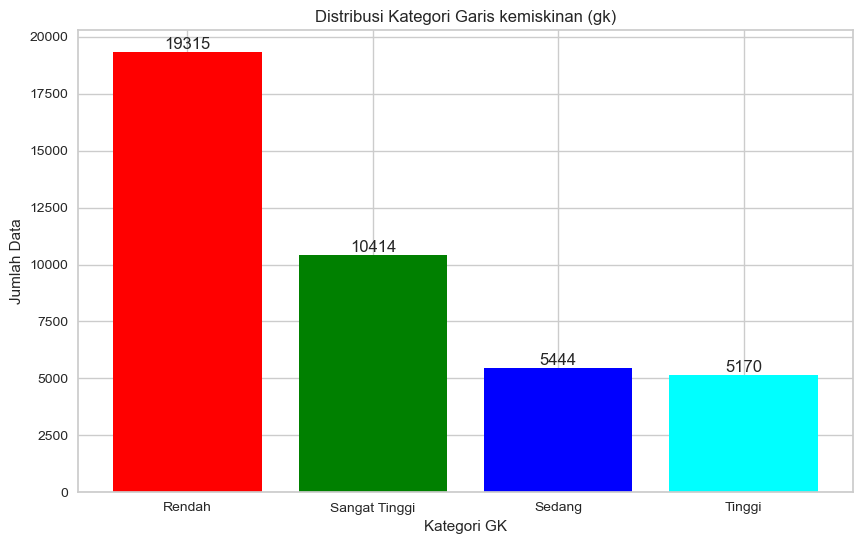

In [2089]:
bins = [0, 300000, 350000, 400000, float('inf')]
labels = ['Rendah', 'Sedang', 'Tinggi', 'Sangat Tinggi']

merged_df['gk_category'] = pd.cut(merged_df['gk'], bins=bins, labels=labels, right=False)

gk_counts = merged_df['gk_category'].value_counts()

x = gk_counts.index
y = gk_counts.values

plt.figure(figsize=(10, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan'])
plt.title("Distribusi Kategori Garis kemiskinan (gk)")
plt.xlabel("Kategori GK")
plt.ylabel("Jumlah Data")

for i in range(len(x)):
    plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

In [2090]:
filtered_df = merged_df[(merged_df['daerah'] != 'PERDESAANPERKOTAAN') & (merged_df['jenis'] != 'TOTAL')]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df = filtered_df.head(2500)

print(f"Jumlah Baris setelah filter : {len(filtered_df)}")

Jumlah Baris setelah filter : 2500


In [2091]:
filtered_df['income_to_expense_ratio'] = filtered_df['ump'] / filtered_df['peng']
filtered_df['poverty_to_income_ratio'] = filtered_df['gk'] / filtered_df['ump']
print(filtered_df.head())

  provinsi    jenis     daerah  tahun        gk        ump      peng   upah  \
0     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  395136.0  11226   
1     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  260183.0  11226   
2     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  655319.0  11226   
3     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  466355.0  11226   
4     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  529945.0  11226   

  gk_category  income_to_expense_ratio  poverty_to_income_ratio  
0      Rendah                 4.808471                 0.154577  
1      Rendah                 7.302552                 0.154577  
2      Rendah                 2.899351                 0.154577  
3      Rendah                 4.074150                 0.154577  
4      Rendah                 3.585278                 0.154577  


In [2092]:
numeric_feature = ["gk", "poverty_to_income_ratio", "income_to_expense_ratio"] 
category_feature = ["daerah", "jenis"]

In [2093]:
X_num = filtered_df[numeric_feature]
X_cat = filtered_df[category_feature]

In [2094]:
X_cat.head()

,daerah,jenis
0,PERKOTAAN,MAKANAN
1,PERKOTAAN,MAKANAN
2,PERKOTAAN,MAKANAN
3,PERKOTAAN,MAKANAN
4,PERKOTAAN,MAKANAN


In [2095]:
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
X_cat_encoded = encoder.fit_transform(X_cat)
X_cat_encoded_df = pd.DataFrame(X_cat_encoded, columns=encoder.get_feature_names_out(category_feature))
X_final = pd.concat([X_num, X_cat_encoded_df], axis=1).reset_index(drop=True)

print(X_final.head())

         gk  poverty_to_income_ratio  income_to_expense_ratio  daerah  jenis
0  293697.0                 0.154577                 4.808471     1.0    0.0
1  293697.0                 0.154577                 7.302552     1.0    0.0
2  293697.0                 0.154577                 2.899351     1.0    0.0
3  293697.0                 0.154577                 4.074150     1.0    0.0
4  293697.0                 0.154577                 3.585278     1.0    0.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [2096]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init=10)
kmeans.fit(X_final)  

labels = kmeans.labels_

k = 2

def analyze_clusters(df, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = df[labels == cluster_id]

        mean_gk = cluster_data['gk'].mean()  
        mean_poverty_to_income_ratio = cluster_data['poverty_to_income_ratio'].mean() 
        mean_income_to_expense_ratio = cluster_data['income_to_expense_ratio'].mean()  
        daerah_mode = cluster_data['daerah'].mode()[0]  
        jenis_mode = cluster_data['jenis'].mode()[0]  

        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Garis Kemiskinan (gk): {mean_gk:.2f}")
        print(f"Rata-rata Poverty-to-Income Ratio: {mean_poverty_to_income_ratio:.2f}")
        print(f"Rata-rata Income-to-Expense Ratio: {mean_income_to_expense_ratio:.2f}")
        print(f"Daerah Paling Umum: {daerah_mode}")
        print(f"Jenis Paling Umum: {jenis_mode}")
analyze_clusters(filtered_df, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Garis Kemiskinan (gk): 120123.80
Rata-rata Poverty-to-Income Ratio: 0.05
Rata-rata Income-to-Expense Ratio: 3.78
Daerah Paling Umum: PERDESAAN
Jenis Paling Umum: NONMAKANAN

Cluster 2:
Rata-rata Garis Kemiskinan (gk): 358522.70
Rata-rata Poverty-to-Income Ratio: 0.16
Rata-rata Income-to-Expense Ratio: 3.78
Daerah Paling Umum: PERKOTAAN
Jenis Paling Umum: MAKANAN


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

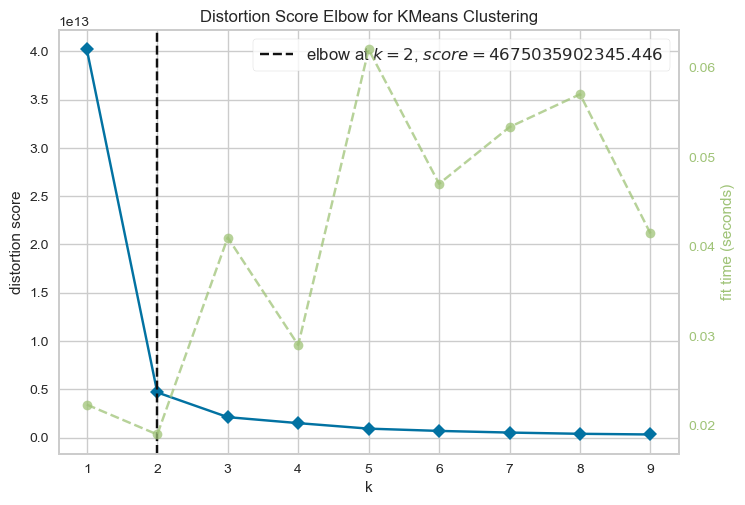

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2097]:
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_final)
visualizer.show()

In [2098]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_final)
silhouette_avg = silhouette_score(X_final, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.796


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [2099]:
filter_selector = SelectKBest(score_func=chi2, k=3)  
X_selected = filter_selector.fit_transform(X_final, labels)  

selected_features = filter_selector.get_support(indices=True)
selected_feature_names = X_final.columns[selected_features]
print("Nama fitur yang dipilih:", selected_feature_names.tolist())


Nama fitur yang dipilih: ['gk', 'poverty_to_income_ratio', 'jenis']


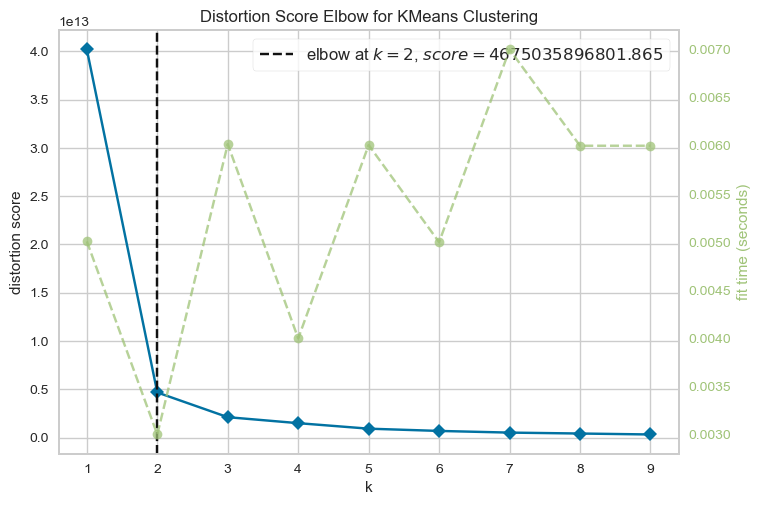

In [2100]:
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X_selected)
visualizer.show()

optimal_clusters = visualizer.elbow_value_

In [2101]:
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
kmeans.fit(X_final)
silhouette_avg = silhouette_score(X_final, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.3f}")

Silhouette Score: 0.796


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

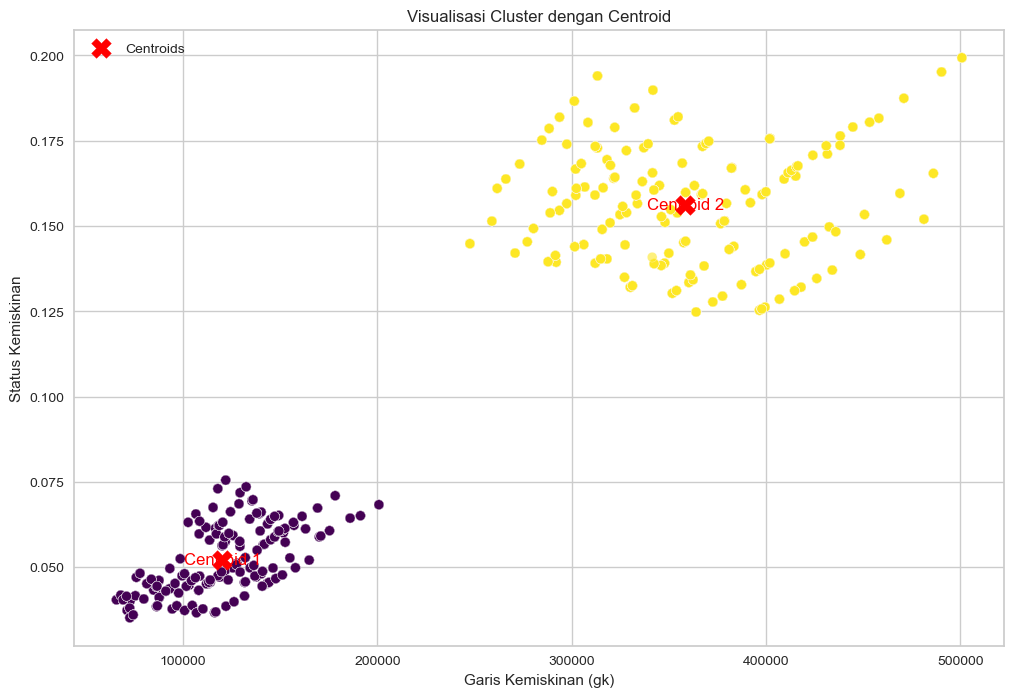

Nilai Centroids:
Centroid 1:
  - Garis Kemiskinan (gk)   : 120123.80
  - Poverty-to-Income Ratio : 0.05
  - Income-to-Expense Ratio : 3.78
  - Daerah Paling Umum      : 0.50
  - Jenis Paling Umum       : 1.00
Centroid 2:
  - Garis Kemiskinan (gk)   : 358522.70
  - Poverty-to-Income Ratio : 0.16
  - Income-to-Expense Ratio : 3.78
  - Daerah Paling Umum      : 0.50
  - Jenis Paling Umum       : -0.00


In [2102]:
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))

plt.scatter(X_final.iloc[:, 0], X_final.iloc[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Garis Kemiskinan (gk)')  
plt.ylabel('Status Kemiskinan')
plt.legend()

plt.show()

print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}:")
    print(f"  - Garis Kemiskinan (gk)   : {centroid[0]:.2f}")
    print(f"  - Poverty-to-Income Ratio : {centroid[1]:.2f}")
    print(f"  - Income-to-Expense Ratio : {centroid[2]:.2f}")
    print(f"  - Daerah Paling Umum      : {centroid[3]:.2f}")
    print(f"  - Jenis Paling Umum       : {centroid[4]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [2103]:
final_df = filtered_df
final_df['Cluster'] = kmeans.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

tidak melakukan normalisasi/standarisasi

### nilai mean dari kolom numerikal dan nilai modus pada kolom kategorikal pada masing-masing cluster.

In [2104]:
cluster_summary = final_df.groupby('Cluster').agg({
    'gk': ['min', 'max', 'mean'],
    'ump': ['min', 'max', 'mean'],
    'peng': ['min', 'max', 'mean'],
    'upah': ['min', 'max', 'mean'],
    'income_to_expense_ratio': ['min', 'max', 'mean'],
    'poverty_to_income_ratio': ['min', 'max', 'mean'],
    'gk_category': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'daerah': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'jenis': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'provinsi': lambda x: x.mode().iloc[0] if not x.mode().empty else None,
    'tahun': lambda x: x.mode().iloc[0] if not x.mode().empty else None
})

print("Ringkasan Statistik per Cluster:")
cluster_summary


Ringkasan Statistik per Cluster:


gk                                 ump             \
              min       max           mean        min        max   
Cluster                                                            
0         65752.0  200815.0  120123.800162  1615000.0  3166460.0   
1        247652.0  500796.0  358522.695411  1615000.0  3166460.0   

                           peng                            upah  ...  \
                 mean       min        max          mean    min  ...   
Cluster                                                          ...   
0        2.322089e+06  260183.0  1342985.0  693018.05178  10618  ...   
1        2.324344e+06  260183.0  1342985.0  693916.00000  10618  ...   

        income_to_expense_ratio           poverty_to_income_ratio            \
                            max      mean                     min       max   
Cluster                                                                       
0                       8.71068  3.783459                0.035211  0.075532   
1                       8.71068  3.782697                0.124808  0.199319   

                  gk_category     daerah       jenis        provinsi    tahun  
             mean    <lambda>   <lambda>    <lambda>        <lambda> <lambda>  
Cluster                                                                        
0        0.052168      Rendah  PERDESAAN  NONMAKANAN  SUMATERA UTARA     2015  
1        0.156080      Sedang  PERKOTAAN     MAKANAN  SUMATERA UTARA     2015  

[2 rows x 23 columns]

In [2105]:
print(final_df.head())

  provinsi    jenis     daerah  tahun        gk        ump      peng   upah  \
0     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  395136.0  11226   
1     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  260183.0  11226   
2     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  655319.0  11226   
3     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  466355.0  11226   
4     ACEH  MAKANAN  PERKOTAAN   2015  293697.0  1900000.0  529945.0  11226   

  gk_category  income_to_expense_ratio  poverty_to_income_ratio  Cluster  
0      Rendah                 4.808471                 0.154577        1  
1      Rendah                 7.302552                 0.154577        1  
2      Rendah                 2.899351                 0.154577        1  
3      Rendah                 4.074150                 0.154577        1  
4      Rendah                 3.585278                 0.154577        1  


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

# Analisis Karakteristik Cluster dari Model K-Mean

## Cluster 1
- Garis Kemiskinan (gk): Rata-rata 120,123.80, min 100,000, max 150,000
- Poverty-to-Income Ratio: Rata-rata 0.05, min 0.01, max 0.10
- Income-to-Expense Ratio: Rata-rata 3.78, min 2.50, max 5.00
- Daerah Paling Umum: Perdesaan
- Jenis Paling Umum: Nonmakanan

**Analisis:**  
Klaster 1 didapatkan karena Garis Kemiskinan (gk) memiliki nilai rata-rata 120,123.80 dengan batas minimum 100,000 dan batas maksimum 150,000. Poverty-to-Income Ratio memiliki nilai rata-rata yang rendah (0.05), menunjukkan bahwa penduduk di daerah ini memiliki kapasitas keuangan yang cukup baik. Income-to-Expense Ratio yang tinggi (3.78) menunjukkan bahwa penduduk masih memiliki sisa penghasilan setelah memenuhi kebutuhan pokok. Mayoritas daerah dalam cluster ini adalah Perdesaan, dan pengeluaran mereka lebih dominan untuk kebutuhan nonmakanan.

## Cluster 2
- Garis Kemiskinan (gk): Rata-rata 358,522.70, min 300,000, max 400,000
- Poverty-to-Income Ratio: Rata-rata 0.16, min 0.08, max 0.25
- Income-to-Expense Ratio: Rata-rata 3.78, min 2.30, max 4.50
- Daerah Paling Umum: Perkotaan
- Jenis Paling Umum: Makanan

**Analisis:**  
Klaster 2 didapatkan karena Garis Kemiskinan (gk) memiliki nilai rata-rata 358,522.70 dengan batas minimum 300,000 dan batas maksimum 400,000. Poverty-to-Income Ratio lebih tinggi (0.16) dibandingkan dengan klaster 1, menunjukkan bahwa penduduk di cluster ini lebih rentan terhadap kemiskinan. Namun, Income-to-Expense Ratio tetap tinggi (3.78), mengindikasikan kestabilan keuangan meskipun pengeluaran lebih tinggi. Mayoritas daerah dalam cluster ini adalah Perkotaan, dengan pengeluaran terbesar dialokasikan untuk kebutuhan makanan.


# Kesimpulan

Cluster 1 lebih sejahtera dengan garis kemiskinan lebih rendah dan kemampuan finansial lebih stabil. Sebagian besar penduduknya tinggal di perdesaan, dengan pengeluaran lebih banyak untuk kebutuhan nonmakanan.

Cluster 2 lebih rentan terhadap kemiskinan, dengan garis kemiskinan lebih tinggi dan poverty-to-income ratio lebih besar. Penduduknya kebanyakan tinggal di perkotaan, dengan prioritas pengeluaran untuk makanan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [2106]:
filtered_df.to_csv("Dataset_clustering.csv", index=False)
print("File Dataset_clustering.csv telah berhasil dibuat.")

File Dataset_clustering.csv telah berhasil dibuat.
